In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
panel_00 = pd.read_excel("pseries001_merge_new6_1.xlsx")

In [3]:
panel_00.head()

,Country,Year,Domestic credit to private sector (% of GDP),GDP growth (annual %),Gross capital formation (annual % growth),Gross fixed capital formation (annual % growth),GDP per capita (constant LCU),GDP (constant LCU),GDP per capita (constant 2015 US$),Gross fixed capital formation (constant LCU),...,General government gross debt,Total investment,lrmp_rv,lfmp_rv,lrmp_hm,lfmp_hm,D_rmp_rv,D_fmp_rv,D_rmp_hm,D_fmp_hm
0,Australia,1997,75.323737,3.912835,NaN,6.637866,56708.83688,1.044750e+12,41550.55110,2.006850e+11,...,25.925,24.422,19.661811,12.754775,14.840804,12.705753,1.0,0.0,0.0,0.0
1,Australia,1998,79.113352,4.613357,NaN,9.743130,58736.64201,1.092950e+12,43036.32342,2.202380e+11,...,23.756,26.170,19.648607,12.697560,14.962744,12.648619,1.0,0.0,0.0,0.0
2,Australia,1999,84.111157,4.956325,NaN,4.439288,60977.08389,1.147120e+12,44677.89465,2.300150e+11,...,22.576,26.352,19.195284,12.711312,15.249997,12.659253,1.0,0.0,0.0,0.0
3,Australia,2000,87.603128,3.901171,NaN,8.093820,62634.94675,1.191870e+12,45892.61037,2.486320e+11,...,19.570,24.970,19.373246,12.810311,14.904004,12.760780,1.0,0.0,0.0,0.0
4,Australia,2001,88.422327,2.041417,NaN,-7.943064,63098.20318,1.216200e+12,46232.03825,2.288830e+11,...,17.180,23.521,19.301370,12.959505,14.868865,12.909509,1.0,0.0,0.0,0.0


In [4]:
panel_00.columns

Index(['Country', 'Year', 'Domestic credit to private sector (% of GDP)',
       'GDP growth (annual %)', 'Gross capital formation (annual % growth)',
       'Gross fixed capital formation (annual % growth)',
       'GDP per capita (constant LCU)', 'GDP (constant LCU)',
       'GDP per capita (constant 2015 US$)',
       'Gross fixed capital formation (constant LCU)',
       'GDP per capita (current LCU)',
       'General government final consumption expenditure (% of GDP)',
       'Trade (% of GDP)', 'Inflation, GDP deflator (annual %)',
       'Country Code', 'Banking_crisis_dummy', 'Regulatory_Quality',
       'Portfolio_investment_assets', 'Real_Expenditure_GDP',
       'Portfolio_investment_debt', 'Portfolio_investment_equity',
       'Real_Public_GDP', 'Real_Priv_GDP', 'Real_Priv_GDP_Machine',
       'Real_Expenditure_GDP_Gross_Fixed', 'Portfolio_investment_liab',
       'Real_Priv_GDP_HH', 'Invest_net_liab', 'Real_Priv_GDP_Building',
       'Real_Priv_GDP_HH_NP', 'Real_Public_GD

In [5]:
# 'Portfolio_investment_debt', 'General government gross debt'
# 'five_yr_CDS'
# 'GDP (constant LCU)'

In [6]:
# panel_00['Portfolio_investment_debt'] * 100 / panel_00['GDP (constant LCU)']
panel_00['General government gross debt'] * 100 / panel_00['GDP (constant LCU)']

0       2.481455e-09
1       2.173567e-09
2       1.968059e-09
3       1.641958e-09
4       1.412597e-09
            ...     
1249             NaN
1250             NaN
1251             NaN
1252             NaN
1253             NaN
Length: 1254, dtype: float64

In [7]:
panel_00.loc[:,"five_yr_CDS_to_100"] = panel_00["five_yr_CDS"]/100
panel_00.loc[:,"Gov_debt_to_GDP"] = panel_00['General government gross debt'] * 100 / panel_00['GDP (constant LCU)']
panel_00.loc[:,"Portf_inv_debt_to_GDP"] = panel_00['Portfolio_investment_debt'] * 100 / panel_00['GDP (constant LCU)']

In [8]:
panel_00_values = panel_00[['Domestic credit to private sector (% of GDP)',
       'GDP growth (annual %)', 'Gross capital formation (annual % growth)',
       'Gross fixed capital formation (annual % growth)',
       'GDP per capita (constant LCU)', 'GDP (constant LCU)',
       'GDP per capita (constant 2015 US$)',
       'Gross fixed capital formation (constant LCU)',
       'GDP per capita (current LCU)',
       'General government final consumption expenditure (% of GDP)',
       'Trade (% of GDP)', 'Inflation, GDP deflator (annual %)',
       'Banking_crisis_dummy', 'Regulatory_Quality',
       'Portfolio_investment_assets', 'Real_Expenditure_GDP',
       'Portfolio_investment_debt', 'Portfolio_investment_equity',
       'Real_Public_GDP', 'Real_Priv_GDP', 'Real_Priv_GDP_Machine',
       'Real_Expenditure_GDP_Gross_Fixed', 'Portfolio_investment_liab',
       'Real_Priv_GDP_HH', 'Invest_net_liab', 'Real_Priv_GDP_Building',
       'Real_Priv_GDP_HH_NP', 'Real_Public_GDP_Gov', 'five_yr_CDS', 'hci',
       'General government gross debt', 'Total investment', 'lrmp_rv',
       'lfmp_rv', 'lrmp_hm', 'lfmp_hm', 'D_rmp_rv', 'D_fmp_rv', 'D_rmp_hm',
       'D_fmp_hm']]

<Axes: >

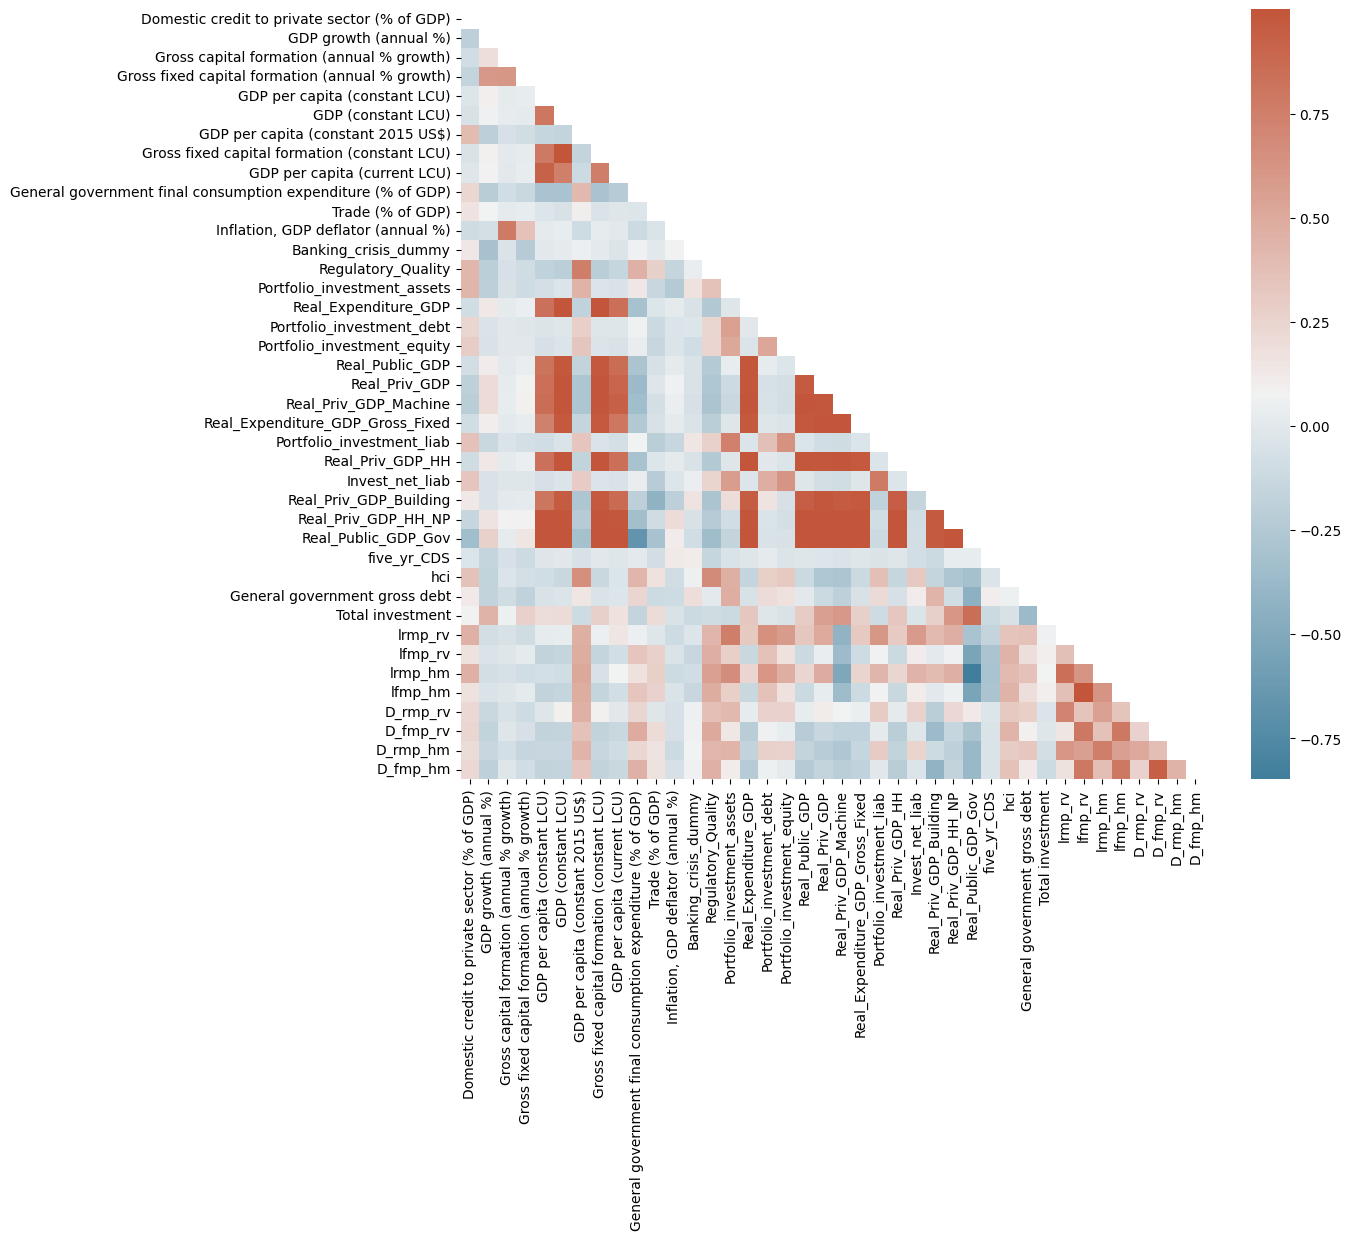

In [9]:
# Correlation between different variables
df = panel_00_values
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=False, mask = mask, cmap=cmap)

In [10]:
gdp_inv_list = ['GDP growth (annual %)', 'Gross capital formation (annual % growth)',
         'Gross fixed capital formation (annual % growth)',
         'Gross fixed capital formation (constant LCU)',
                ]
foreign_debt_list = ["Portfolio_investment_debt",
            "Portf_inv_debt_to_GDP"]
others_list = ['GDP per capita (constant LCU)', 'GDP (constant LCU)',
       'GDP per capita (constant 2015 US$)', 'GDP per capita (current LCU)',
       'Portfolio_investment_assets', 'Portfolio_investment_equity','Real_Expenditure_GDP',
       'Real_Public_GDP', 'Real_Priv_GDP', 'Real_Priv_GDP_Machine',
       'Real_Expenditure_GDP_Gross_Fixed', 'Real_Priv_GDP_HH', 'Invest_net_liab', 'Real_Priv_GDP_Building',
       'Real_Priv_GDP_HH_NP', 'Real_Public_GDP_Gov','Total investment', 'lrmp_rv',
       'lfmp_rv', 'lrmp_hm', 'lfmp_hm','Portfolio_investment_liab']
instument_list = ['five_yr_CDS', 'five_yr_CDS_to_100']
new_dummies = ['D_rmp_rv', 'D_fmp_rv', 'D_rmp_hm',
       'D_fmp_hm']

In [11]:
control_list = ['Domestic credit to private sector (% of GDP)',
      'General government final consumption expenditure (% of GDP)',
       'Trade (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Banking_crisis_dummy', 'Regulatory_Quality',
       'hci',
       'General government gross debt']

2SLS Regression

In [12]:
# Benchmark
panel_01 = panel_00.copy()
panel_001 = panel_01[["Country","Year"] + control_list +
 ['five_yr_CDS_to_100',"Portf_inv_debt_to_GDP"] + ["GDP growth (annual %)"]]
panel_001 = panel_001.dropna()

In [13]:
panel_001 # 494 rows

,Country,Year,Domestic credit to private sector (% of GDP),General government final consumption expenditure (% of GDP),Trade (% of GDP),"Inflation, GDP deflator (annual %)",Banking_crisis_dummy,Regulatory_Quality,hci,General government gross debt,five_yr_CDS_to_100,Portf_inv_debt_to_GDP,GDP growth (annual %)
4,Australia,2001,88.422327,18.475985,44.250356,4.620333,0.0,1.498385,3.527512,17.180,0.040000,4.207113e-07,2.041417
5,Australia,2002,91.267412,18.290315,41.471680,2.844065,0.0,1.421156,3.516423,15.063,0.047500,3.931148e-07,3.993590
6,Australia,2003,99.185841,18.355064,40.222301,2.967938,0.0,1.575263,3.505370,13.220,0.040000,3.642559e-07,3.111398
7,Australia,2004,102.667270,18.244483,37.029712,3.237062,0.0,1.711220,3.494351,11.943,0.034167,1.052936e-06,4.216633
8,Australia,2005,108.493571,18.323952,39.182594,3.824360,0.0,1.599513,3.483366,10.893,0.020000,1.064932e-06,3.153753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,Uruguay,2012,22.170529,13.273834,55.061154,9.412912,0.0,0.599089,2.621709,58.010,1.483975,2.564668e-08,3.538179
1194,Uruguay,2013,24.376882,13.522430,49.717846,8.999247,0.0,0.715801,2.643269,60.184,1.661918,4.915624e-08,4.637539
1195,Uruguay,2014,25.166793,13.696393,49.087624,10.220657,0.0,0.723711,2.665007,61.404,1.712788,2.970222e-08,3.238791
1196,Uruguay,2015,27.814009,13.835810,45.328241,9.855420,0.0,0.601099,2.686923,64.287,3.377867,1.134794e-07,0.370741


In [14]:
panel_001.Year.min(), panel_001.Year.max()

(1997, 2015)

In [16]:
len(list(set(panel_001.Country.tolist()))) # Number of Countries incurred

48

In [72]:
# First stage regression (foreign debt on CDS Spread and controls)
X_first_stage = sm.add_constant(panel_001[['five_yr_CDS_to_100'] + control_list])
first_stage_model = sm.OLS(panel_001['Portf_inv_debt_to_GDP'], X_first_stage).fit()
panel_001['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()

# Second stage regression (growth on fitted foreign debt and CDS Spread and controls)
X_second_stage = sm.add_constant(panel_001[['fitted_Portf_inv_debt_to_GDP',
                      'five_yr_CDS_to_100'] + control_list])
second_stage_model = sm.OLS(panel_001['GDP growth (annual %)'], X_second_stage).fit()

# Print regression results
print("First Stage Results:")
print(first_stage_model.summary())

print("\nSecond Stage Results:")
print(second_stage_model.summary())

First Stage Results:
                              OLS Regression Results                             
Dep. Variable:     Portf_inv_debt_to_GDP   R-squared:                       0.111
Model:                               OLS   Adj. R-squared:                  0.094
Method:                    Least Squares   F-statistic:                     6.688
Date:                   Mon, 28 Aug 2023   Prob (F-statistic):           4.75e-09
Time:                           01:18:31   Log-Likelihood:                 4948.8
No. Observations:                    494   AIC:                            -9878.
Df Residuals:                        484   BIC:                            -9836.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [32]:
1.19e-01 == 1.19*10**(-1)

True

In [17]:
# Considering Potentials
panel_002 = panel_01[["Country","Year"] + control_list +
 ['five_yr_CDS_to_100',"Portf_inv_debt_to_GDP"] + ["GDP growth (annual %)"]
 + new_dummies]
panel_002 = panel_002.dropna()

In [18]:
# panel_002 # 494 rows
panel_002_D_rmp_rv_1 = panel_002[panel_002["D_rmp_rv"]==1]
panel_002_D_rmp_rv_0 = panel_002[panel_002["D_rmp_rv"]==0]
panel_002_D_fmp_rv_1 = panel_002[panel_002["D_fmp_rv"]==1]
panel_002_D_fmp_rv_0 = panel_002[panel_002["D_fmp_rv"]==0]
panel_002_D_rmp_hm_1 = panel_002[panel_002["D_rmp_hm"]==1]
panel_002_D_rmp_hm_0 = panel_002[panel_002["D_rmp_hm"]==0]
panel_002_D_fmp_hm_1 = panel_002[panel_002["D_fmp_hm"]==1]
panel_002_D_fmp_hm_0 = panel_002[panel_002["D_fmp_hm"]==0]

In [20]:
# panel_002_D_rmp_rv_1 # 283
panel_002_D_rmp_rv_1.Year.min(), panel_002_D_rmp_rv_1.Year.max(), len(list(set(panel_002_D_rmp_rv_1.Country.tolist())))

(1997, 2015, 25)

In [21]:
panel_002_D_rmp_rv_0.Year.min(), panel_002_D_rmp_rv_0.Year.max(), len(list(set(panel_002_D_rmp_rv_0.Country.tolist())))

(1997, 2015, 23)

In [22]:
panel_002_D_fmp_rv_1.Year.min(), panel_002_D_fmp_rv_1.Year.max(), len(list(set(panel_002_D_fmp_rv_1.Country.tolist())))

(1997, 2015, 25)

In [23]:
panel_002_D_fmp_rv_0.Year.min(), panel_002_D_fmp_rv_0.Year.max(), len(list(set(panel_002_D_fmp_rv_0.Country.tolist())))

(1997, 2015, 23)

In [24]:
panel_002_D_rmp_hm_1.Year.min(), panel_002_D_rmp_hm_1.Year.max(), len(list(set(panel_002_D_rmp_hm_1.Country.tolist())))

(1997, 2015, 23)

In [25]:
panel_002_D_rmp_hm_0.Year.min(), panel_002_D_rmp_hm_0.Year.max(), len(list(set(panel_002_D_rmp_hm_0.Country.tolist())))

(1997, 2015, 25)

In [26]:
panel_002_D_fmp_hm_1.Year.min(), panel_002_D_fmp_hm_1.Year.max(), len(list(set(panel_002_D_fmp_hm_1.Country.tolist())))

(1997, 2015, 26)

In [27]:
panel_002_D_fmp_hm_0.Year.min(), panel_002_D_fmp_hm_0.Year.max(), len(list(set(panel_002_D_fmp_hm_0.Country.tolist())))

(1997, 2015, 22)

In [69]:
# panel_002_D_rmp_rv_0 # 211
# panel_002_D_fmp_rv_1 # 269
# panel_002_D_fmp_rv_0 # 225
# panel_002_D_rmp_hm_1 # 256
# panel_002_D_rmp_hm_0 # 238
# panel_002_D_fmp_hm_1 # 278
# panel_002_D_fmp_hm_0 # 216

In [73]:
# First stage regression (foreign debt on CDS Spread and controls)
X_first_stage = sm.add_constant(panel_002_D_rmp_rv_1[['five_yr_CDS_to_100'] + control_list])
first_stage_model = sm.OLS(panel_002_D_rmp_rv_1['Portf_inv_debt_to_GDP'], X_first_stage).fit()
panel_002_D_rmp_rv_1['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()

# Second stage regression (growth on fitted foreign debt and CDS Spread and controls)
X_second_stage = sm.add_constant(panel_002_D_rmp_rv_1[['fitted_Portf_inv_debt_to_GDP',
                      'five_yr_CDS_to_100'] + control_list])
second_stage_model = sm.OLS(panel_002_D_rmp_rv_1['GDP growth (annual %)'], X_second_stage).fit()

# Print regression results
print("First Stage Results:")
print(first_stage_model.summary())

print("\nSecond Stage Results:")
print(second_stage_model.summary())

<ipython-input-73-1422367bda95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_002_D_rmp_rv_1['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()


First Stage Results:
                              OLS Regression Results                             
Dep. Variable:     Portf_inv_debt_to_GDP   R-squared:                       0.240
Model:                               OLS   Adj. R-squared:                  0.215
Method:                    Least Squares   F-statistic:                     9.590
Date:                   Mon, 28 Aug 2023   Prob (F-statistic):           1.03e-12
Time:                           01:20:07   Log-Likelihood:                 2871.2
No. Observations:                    283   AIC:                            -5722.
Df Residuals:                        273   BIC:                            -5686.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [74]:
X_first_stage = sm.add_constant(panel_002_D_rmp_rv_0[['five_yr_CDS_to_100'] + control_list])
first_stage_model = sm.OLS(panel_002_D_rmp_rv_0['Portf_inv_debt_to_GDP'], X_first_stage).fit()
panel_002_D_rmp_rv_0['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()

# Second stage regression (growth on fitted foreign debt and CDS Spread and controls)
X_second_stage = sm.add_constant(panel_002_D_rmp_rv_0[['fitted_Portf_inv_debt_to_GDP',
                      'five_yr_CDS_to_100'] + control_list])
second_stage_model = sm.OLS(panel_002_D_rmp_rv_0['GDP growth (annual %)'], X_second_stage).fit()

# Print regression results
print("First Stage Results:")
print(first_stage_model.summary())

print("\nSecond Stage Results:")
print(second_stage_model.summary())

First Stage Results:
                              OLS Regression Results                             
Dep. Variable:     Portf_inv_debt_to_GDP   R-squared:                       0.103
Model:                               OLS   Adj. R-squared:                  0.062
Method:                    Least Squares   F-statistic:                     2.552
Date:                   Mon, 28 Aug 2023   Prob (F-statistic):            0.00851
Time:                           01:21:11   Log-Likelihood:                 2102.0
No. Observations:                    211   AIC:                            -4184.
Df Residuals:                        201   BIC:                            -4150.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

<ipython-input-74-2a1b5ae7dadc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_002_D_rmp_rv_0['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()


In [75]:
X_first_stage = sm.add_constant(panel_002_D_fmp_rv_1[['five_yr_CDS_to_100'] + control_list])
first_stage_model = sm.OLS(panel_002_D_fmp_rv_1['Portf_inv_debt_to_GDP'], X_first_stage).fit()
panel_002_D_fmp_rv_1['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()

# Second stage regression (growth on fitted foreign debt and CDS Spread and controls)
X_second_stage = sm.add_constant(panel_002_D_fmp_rv_1[['fitted_Portf_inv_debt_to_GDP',
                      'five_yr_CDS_to_100'] + control_list])
second_stage_model = sm.OLS(panel_002_D_fmp_rv_1['GDP growth (annual %)'], X_second_stage).fit()

# Print regression results
print("First Stage Results:")
print(first_stage_model.summary())

print("\nSecond Stage Results:")
print(second_stage_model.summary())

First Stage Results:
                              OLS Regression Results                             
Dep. Variable:     Portf_inv_debt_to_GDP   R-squared:                       0.211
Model:                               OLS   Adj. R-squared:                  0.184
Method:                    Least Squares   F-statistic:                     7.695
Date:                   Mon, 28 Aug 2023   Prob (F-statistic):           5.07e-10
Time:                           01:21:50   Log-Likelihood:                 2630.6
No. Observations:                    269   AIC:                            -5241.
Df Residuals:                        259   BIC:                            -5205.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

<ipython-input-75-84d3f037e17f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_002_D_fmp_rv_1['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()


In [76]:
X_first_stage = sm.add_constant(panel_002_D_fmp_rv_0[['five_yr_CDS_to_100'] + control_list])
first_stage_model = sm.OLS(panel_002_D_fmp_rv_0['Portf_inv_debt_to_GDP'], X_first_stage).fit()
panel_002_D_fmp_rv_0['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()

# Second stage regression (growth on fitted foreign debt and CDS Spread and controls)
X_second_stage = sm.add_constant(panel_002_D_fmp_rv_0[['fitted_Portf_inv_debt_to_GDP',
                      'five_yr_CDS_to_100'] + control_list])
second_stage_model = sm.OLS(panel_002_D_fmp_rv_0['GDP growth (annual %)'], X_second_stage).fit()

# Print regression results
print("First Stage Results:")
print(first_stage_model.summary())

print("\nSecond Stage Results:")
print(second_stage_model.summary())

First Stage Results:
                              OLS Regression Results                             
Dep. Variable:     Portf_inv_debt_to_GDP   R-squared:                       0.304
Model:                               OLS   Adj. R-squared:                  0.275
Method:                    Least Squares   F-statistic:                     10.45
Date:                   Mon, 28 Aug 2023   Prob (F-statistic):           2.28e-13
Time:                           01:22:18   Log-Likelihood:                 2972.2
No. Observations:                    225   AIC:                            -5924.
Df Residuals:                        215   BIC:                            -5890.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

<ipython-input-76-9a51ba59d9e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_002_D_fmp_rv_0['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()


In [77]:
X_first_stage = sm.add_constant(panel_002_D_rmp_hm_1[['five_yr_CDS_to_100'] + control_list])
first_stage_model = sm.OLS(panel_002_D_rmp_hm_1['Portf_inv_debt_to_GDP'], X_first_stage).fit()
panel_002_D_rmp_hm_1['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()

# Second stage regression (growth on fitted foreign debt and CDS Spread and controls)
X_second_stage = sm.add_constant(panel_002_D_rmp_hm_1[['fitted_Portf_inv_debt_to_GDP',
                      'five_yr_CDS_to_100'] + control_list])
second_stage_model = sm.OLS(panel_002_D_rmp_hm_1['GDP growth (annual %)'], X_second_stage).fit()

# Print regression results
print("First Stage Results:")
print(first_stage_model.summary())

print("\nSecond Stage Results:")
print(second_stage_model.summary())

First Stage Results:
                              OLS Regression Results                             
Dep. Variable:     Portf_inv_debt_to_GDP   R-squared:                       0.213
Model:                               OLS   Adj. R-squared:                  0.184
Method:                    Least Squares   F-statistic:                     7.398
Date:                   Mon, 28 Aug 2023   Prob (F-statistic):           1.50e-09
Time:                           01:22:53   Log-Likelihood:                 2497.9
No. Observations:                    256   AIC:                            -4976.
Df Residuals:                        246   BIC:                            -4940.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

<ipython-input-77-d12711f12a8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_002_D_rmp_hm_1['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()


In [78]:
X_first_stage = sm.add_constant(panel_002_D_rmp_hm_0[['five_yr_CDS_to_100'] + control_list])
first_stage_model = sm.OLS(panel_002_D_rmp_hm_0['Portf_inv_debt_to_GDP'], X_first_stage).fit()
panel_002_D_rmp_hm_0['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()

# Second stage regression (growth on fitted foreign debt and CDS Spread and controls)
X_second_stage = sm.add_constant(panel_002_D_rmp_hm_0[['fitted_Portf_inv_debt_to_GDP',
                      'five_yr_CDS_to_100'] + control_list])
second_stage_model = sm.OLS(panel_002_D_rmp_hm_0['GDP growth (annual %)'], X_second_stage).fit()

# Print regression results
print("First Stage Results:")
print(first_stage_model.summary())

print("\nSecond Stage Results:")
print(second_stage_model.summary())

First Stage Results:
                              OLS Regression Results                             
Dep. Variable:     Portf_inv_debt_to_GDP   R-squared:                       0.259
Model:                               OLS   Adj. R-squared:                  0.230
Method:                    Least Squares   F-statistic:                     8.851
Date:                   Mon, 28 Aug 2023   Prob (F-statistic):           2.05e-11
Time:                           01:23:16   Log-Likelihood:                 2902.4
No. Observations:                    238   AIC:                            -5785.
Df Residuals:                        228   BIC:                            -5750.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

<ipython-input-78-f26a011f15c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_002_D_rmp_hm_0['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()


In [79]:
X_first_stage = sm.add_constant(panel_002_D_fmp_hm_1[['five_yr_CDS_to_100'] + control_list])
first_stage_model = sm.OLS(panel_002_D_fmp_hm_1['Portf_inv_debt_to_GDP'], X_first_stage).fit()
panel_002_D_fmp_hm_1['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()

# Second stage regression (growth on fitted foreign debt and CDS Spread and controls)
X_second_stage = sm.add_constant(panel_002_D_fmp_hm_1[['fitted_Portf_inv_debt_to_GDP',
                      'five_yr_CDS_to_100'] + control_list])
second_stage_model = sm.OLS(panel_002_D_fmp_hm_1['GDP growth (annual %)'], X_second_stage).fit()

# Print regression results
print("First Stage Results:")
print(first_stage_model.summary())

print("\nSecond Stage Results:")
print(second_stage_model.summary())

First Stage Results:
                              OLS Regression Results                             
Dep. Variable:     Portf_inv_debt_to_GDP   R-squared:                       0.208
Model:                               OLS   Adj. R-squared:                  0.182
Method:                    Least Squares   F-statistic:                     7.831
Date:                   Mon, 28 Aug 2023   Prob (F-statistic):           2.99e-10
Time:                           01:23:58   Log-Likelihood:                 2722.6
No. Observations:                    278   AIC:                            -5425.
Df Residuals:                        268   BIC:                            -5389.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

<ipython-input-79-97ae90a4409e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_002_D_fmp_hm_1['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()


In [80]:
X_first_stage = sm.add_constant(panel_002_D_fmp_hm_0[['five_yr_CDS_to_100'] + control_list])
first_stage_model = sm.OLS(panel_002_D_fmp_hm_0['Portf_inv_debt_to_GDP'], X_first_stage).fit()
panel_002_D_fmp_hm_0['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()

# Second stage regression (growth on fitted foreign debt and CDS Spread and controls)
X_second_stage = sm.add_constant(panel_002_D_fmp_hm_0[['fitted_Portf_inv_debt_to_GDP',
                      'five_yr_CDS_to_100'] + control_list])
second_stage_model = sm.OLS(panel_002_D_fmp_hm_0['GDP growth (annual %)'], X_second_stage).fit()

# Print regression results
print("First Stage Results:")
print(first_stage_model.summary())

print("\nSecond Stage Results:")
print(second_stage_model.summary())

First Stage Results:
                              OLS Regression Results                             
Dep. Variable:     Portf_inv_debt_to_GDP   R-squared:                       0.322
Model:                               OLS   Adj. R-squared:                  0.292
Method:                    Least Squares   F-statistic:                     10.86
Date:                   Mon, 28 Aug 2023   Prob (F-statistic):           8.90e-14
Time:                           01:24:21   Log-Likelihood:                 2862.1
No. Observations:                    216   AIC:                            -5704.
Df Residuals:                        206   BIC:                            -5670.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

<ipython-input-80-0b2cda4c0d16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_002_D_fmp_hm_0['fitted_Portf_inv_debt_to_GDP'] = first_stage_model.predict()
